In [1]:
# read the network
filepath = '10k5.graph'
vertices = [];
edges = [];
readVertices = 0;
readEdges = 0;
with open(filepath) as fp:  
    line = fp.readline()
    cnt = 1
    while line:
        #print("Line {}: {}".format(cnt, line.strip()))
        
        if readVertices == 1:
            vertexData = line.strip().split(';');
            if len(vertexData)==4:
                idxGroup = int(vertexData[3]);
                vertices.append([int(vertexData[0]),idxGroup])
                
        if readEdges == 1:
            edgeData = line.strip().split(';');
            if len(edgeData)==2:
                edges.append([int(edgeData[0]),int(edgeData[1])])
                vertices[int(edgeData[0])].append(int(edgeData[1]));

        
        if line.strip() == '# Vertices':
            print('read vertices')
            readVertices = 1;
        if line.strip() == '# Edges':
            readVertices = 0;
            readEdges = 1;
            print('read edge')
        line = fp.readline()
        cnt += 1
        line.strip() 
#array con 1 elemento: numero vertice, 2 elemento: grupo que se encuentra
# resto son los vertices con los que se comunica
#print(edges)

read vertices
read edge


Tamaño poblacion
10000
cantidad de pares de comunicacion


<Figure size 640x480 with 1 Axes>

Porcentaje grupos con distinta media de crimen
[0.1869 0.156  0.237  0.2202 0.1999]
Vector media de crimen por grupos
[0.2  0.35 0.   0.6  0.8 ]
velocidad de olvido
0.9
impacto de la inseguridad nu
0.9
Resistencia a la inseguridad mu
0.1
Homofilia
0.20391025641025642


/home/runlab/.virtualenvs/cpulido/local/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/home/runlab/.virtualenvs/cpulido/local/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/home/runlab/.virtualenvs/cpulido/local/lib/python2.7/site-packages/scipy/linalg/__init__.py:207: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/home/runlab/.virtualenvs/cpulido/local/lib/python2.7/site-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/home/runlab/.virtualenvs/cpulido/local/lib/python2.7/site-

PoS media por grupos


/home/runlab/.virtualenvs/cpulido/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(-25,0,'Secure')

<Figure size 1440x360 with 0 Axes>

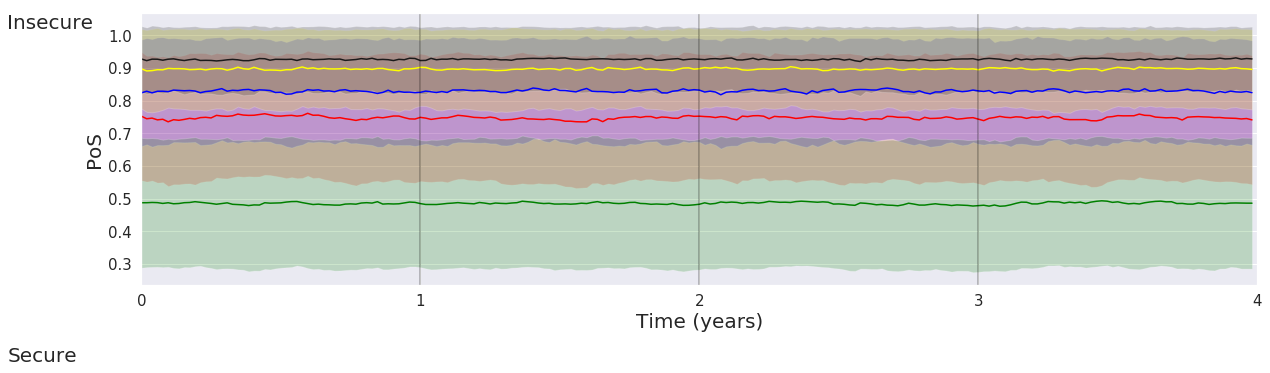

In [2]:
#Simulacion Pos
import numpy as np
import random
import matplotlib.pyplot as plt
n=len(vertices)
#vector identificacion de grupo
g=np.zeros(n)
for i in range(n):
    g[i]=vertices[i][1]
# cantidad de grupos
m=int(max(g)+1)
#porcentaje de cada grupo
q=np.zeros(m)
for i in range(m):
    q[i]=sum((g==i)*1.0)/n
#periodos en semanas
T=312 #6 años
s = np.random.rand(n)  # vector PoS de las personas en el intante t, al principio aleatorio
psi = 0.9  # velocidad perdida de memoria
nu = 0.9  # Impacto de la inseguridad
mu = 0.1  # Resistencia a la inseguridad
St = np.zeros((T,n ))  # PoS a lo largo del tiempo
lamda=np.array([0.2,0.35,0,0.6,0.8])
#lamda = np.random.rand(m)  # tasas de crimen de los grupos
#lamda[np.argmax(q)]=0 # para la mayor parte es el grupo inmune
#lamda=[0.05,0,0.5]
#identificacion de cada sujeto con su respectiva media de crimen
for i in range(n):
    for j in range(m):
        if g[i]==j:
            g[i]=lamda[j]
homofilia=np.zeros(T)
St[0] = s
parescom=np.zeros(T)#cantidad pares de comunicacion en cada periodo
commismogrupo=np.zeros(T)#cantidad de comunicaciones en el mismo grupo
for t in range(1,T):
        # Al inicio de cada periodo aplicamos la perdida de memoria
        s = psi * s
        
        #escogemos las parejas de comunicacion 
        paleatorio=np.random.permutation(np.arange(n))#personas grupo 1 en orden aleatorio
        persona1=paleatorio[:int(n*0.1)] #primer 10%
        persona2=paleatorio[-int(n*0.1):]#ultimo 10%


        for k in range(len(persona1)):
            #para grupo 1
            aux1=persona1[k]
            aux2=persona2[k]
            contador=0
            if s[aux1]<s[aux2]:
                s[aux1] = s[aux1] - nu * (s[aux1] - s[aux2])
                s[aux2] = s[aux2] - mu * (s[aux2] - s[aux1])
            else:
                s[aux1] = s[aux1] - mu * (s[aux1] - s[aux2])
                s[aux2] = s[aux2] - nu * (s[aux2] - s[aux1])

            if g[aux1]==g[aux2]:
                commismogrupo[t]=commismogrupo[t]+1
        
        parescom[t]=len(persona1)
        homofilia[t]=commismogrupo[t]/parescom[t]
    

        for k in range(n):
            # numero de crimenes sufridos por la persona k 
            X = np.random.poisson(g[k])
            # posicion hubo crimen o no
            I = 0
            if X >= 1:  # si hubo al menos un crimen I=1 de lo contrario I=0
                I = 1
            # efecto del crimen en la percepcion de k para el siguiente periodo
            s[k] = I + (1 - I) * s[k] 
        St[t] = s
print("Tamaño poblacion")
print(n)
print("cantidad de pares de comunicacion")
plt.plot(parescom[1:])
plt.show()
print("Porcentaje grupos con distinta media de crimen")
print(q)
print("Vector media de crimen por grupos")
print(lamda)
print("velocidad de olvido")
print(psi)
print("impacto de la inseguridad nu")
print(nu)
print("Resistencia a la inseguridad mu")
print(mu)
print("Homofilia")
print(np.mean(homofilia))

%matplotlib inline 
plt.figure(figsize=(20,5))
#print("Grafica PoS individual")
#plt.plot(St[104:],alpha=0.1)
#plt.plot(np.mean(St[104:],axis=1),'blue',linewidth=8)
#plt.show()
import seaborn as sns
sns.set(color_codes=True)
plt.figure(figsize=(20,5))
print("PoS media por grupos")
colores=["Red","Blue","Green","yellow","k"]
G=[]
for i in range(m):
    grupo=np.zeros((T,int(n*q[i])))
    contador=0
    for k in range(n):
        if g[k]==lamda[i]:
            grupo[:,contador]=St[:,k]
            contador=contador+1
    #plt.plot(grupo,alpha=0.1)
    sns.tsplot(data=grupo[104:].T,ci='sd',color=colores[i])
    G.append(grupo[104:].T)
#plt.legend(["susceptible", "immune", "highly susceptible"],ncol=3,fontsize=20,bbox_to_anchor=(0, -0.3), loc=2, borderaxespad=0)
plt.axvline(52, color = 'black',alpha=0.3)
plt.axvline(104, color = 'black',alpha=0.3)
plt.axvline(156, color = 'black',alpha=0.3)
plt.xlabel("Time (years)",fontsize=20)
plt.ylabel("PoS",fontsize=20)
ax = plt.axes()
ax.xaxis.set_ticks([0, 52, 104, 156, 208])
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4'])
ax.tick_params(labelsize=15)
plt.text(-25, 1.02,'Insecure', fontsize=20)
plt.text(-25, 0,'Secure', fontsize=20)

                

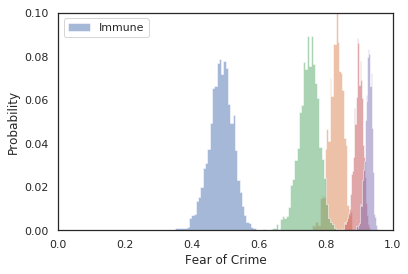

In [10]:
colors=['Blue','Green','indigo','Red','black']


for k in [2,1,0,3,4]:
    p=G[k].shape[0]
    g=np.zeros(p)
    for j in range(p):
        g[j]=np.mean(G[k][j])
    weights = np.ones_like(g)*1.0/float(len(g))#n
    sns.distplot(g,hist_kws={'weights':weights,'alpha':0.5,'histtype':'stepfilled'},kde=False)
    
plt.xlim(0,1)
plt.ylim(0,0.1)
plt.xlabel('Fear of Crime')
plt.ylabel('Probability')
sns.set_style("white")
plt.grid(False)
plt.legend(["Immune"])


plt.savefig("dist_5g_nog.pdf")

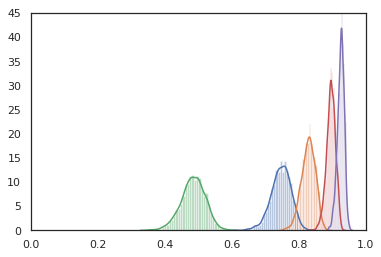

In [4]:
for k in range(m):
    p=G[k].shape[0]
    g=np.zeros(p)
    for j in range(p):
        g[j]=np.mean(G[k][j])

#         g=G[k][:,t]
    sns.distplot(g)
plt.xlim(0,1)
plt.ylim(0,45)
plt.savefig("dist_5g_nog.svg")

          0         1         2         3         4
0  0.000000  0.462746  1.356926  0.939576  1.176606
1  0.462746  0.000000  1.895700  0.477505  0.742681
2  1.356926  1.895700  0.000000  2.499913  2.766573
3  0.939576  0.477505  2.499913  0.000000  0.265818
4  1.176606  0.742681  2.766573  0.265818  0.000000


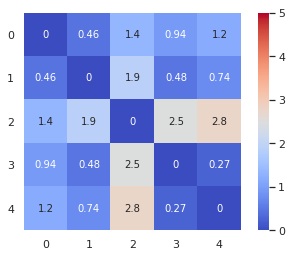

In [5]:
tiempo=G[0].shape[1]
g=[]
for k in range(m):
    mean=np.zeros(tiempo)
    std=np.zeros(tiempo)
    for i in range(tiempo):
        mean[i]=np.mean(G[k][i][:])
        std[i]=np.std(G[k][i][:])
    g.append((G[k],mean,std))

D=np.zeros((m,m))
for k in range(m):
    for n in range(m):
        d=np.zeros(tiempo)
        for i in range(tiempo):
            N1=g[k][0].shape[0]
            N2=g[n][0].shape[0]
            s2=((N1-1)*g[k][2][i]**2+(N2-1)*g[n][2][i]**2)/(N1+N2-2)
            d[i]=(g[k][1][i]-g[n][1][i])/np.sqrt(s2)
        D[k][n]=abs(np.mean(d))
from pandas import DataFrame
D = DataFrame(D)
print(D)
ax = sns.heatmap(D,annot=True,cmap="coolwarm",square=True, vmax=5,vmin=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
plt.savefig("m5_no_graph.svg")

In [6]:
for i in range(m):
    print(np.mean(g[i][1]))

0.7487620654121229
0.8308839631652893
0.4870981863920211
0.8966336220576425
0.9263225636996822


In [7]:
lamda # media crimen por grupo

array([0.2 , 0.35, 0.  , 0.6 , 0.8 ])